_Lambda School Data Science_

# Sequence your narrative

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

## Make a plan

#### How to present the data?

Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


#### How to structure the data?

| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


## Upgrade Seaborn

Make sure you have at least version 0.9.0.

In Colab, go to **Restart runtime** after you run the `pip` command.

In [63]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [64]:
import seaborn as sns
sns.__version__

'0.9.0'

## More imports

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Load & look at data

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [71]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [72]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [73]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [74]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [75]:
pd.options.display.max_columns = 500
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [76]:
entities.world_6region.value_counts()

europe_central_asia         77
sub_saharan_africa          53
america                     53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [77]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


## Merge data

https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [78]:

merged = pd.merge(income, lifespan)
merged.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [79]:
merged2 = pd.merge(merged, population)
merged2.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [80]:
df = pd.merge(merged2, entities[['country', 'name', 'world_6region']], how='inner', left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 8)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,south_asia


In [81]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,name,world_6region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


In [0]:
df = df.rename(columns={'time':'year', 'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 'life_expectancy_years': 'lifespan',
                       'population_total': 'population', 'name': 'country', 'world_6region': 'region'})

In [83]:
print(df.shape)
print(df.isna().sum())
df.head()

(40437, 6)
year          0
income        0
lifespan      0
population    0
country       0
region        0
dtype: int64


,year,income,lifespan,population,country,region
0,1800,603,28.21,3280000,Afghanistan,south_asia
1,1801,603,28.20,3280000,Afghanistan,south_asia
2,1802,603,28.19,3280000,Afghanistan,south_asia
3,1803,603,28.18,3280000,Afghanistan,south_asia
4,1804,603,28.17,3280000,Afghanistan,south_asia


## Explore data

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40437 entries, 0 to 40436
Data columns (total 6 columns):
year          40437 non-null int64
income        40437 non-null int64
lifespan      40437 non-null float64
population    40437 non-null int64
country       40437 non-null object
region        40437 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 2.2+ MB


In [85]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [86]:
df.describe(exclude='number')

,country,region
count,40437,40437
unique,187,6
top,Qatar,europe_central_asia
freq,219,10778


In [87]:
df.country.value_counts()

Qatar                             219
Cape Verde                        219
Azerbaijan                        219
Guinea-Bissau                     219
India                             219
Equatorial Guinea                 219
Iraq                              219
Netherlands                       219
Kazakhstan                        219
Yemen                             219
Poland                            219
Moldova                           219
Afghanistan                       219
Jordan                            219
Senegal                           219
South Sudan                       219
Ecuador                           219
Argentina                         219
North Korea                       219
Uzbekistan                        219
Pakistan                          219
United States                     219
Oman                              219
Lao                               219
South Africa                      219
Malaysia                          219
Vietnam     

In [88]:
df.country.nunique()

187

In [89]:
usa = df[df.country == 'United States']
usa[usa.year.isin([1818, 1918, 2018])]


,year,income,lifespan,population,country,region
38046,1818,2258,39.41,9879049,United States,america
38146,1918,9371,47.18,106721812,United States,america
38246,2018,54898,79.14,326766748,United States,america


In [90]:
china = df[df.country == 'China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
6854,1818,985,32.00,374161494,China,east_asia_pacific
6954,1918,989,22.13,462444535,China,east_asia_pacific
7054,2018,16018,76.92,1415045928,China,east_asia_pacific


## Plot visualization

In [91]:
now = df[df.year == 2018]
now.shape


(184, 6)

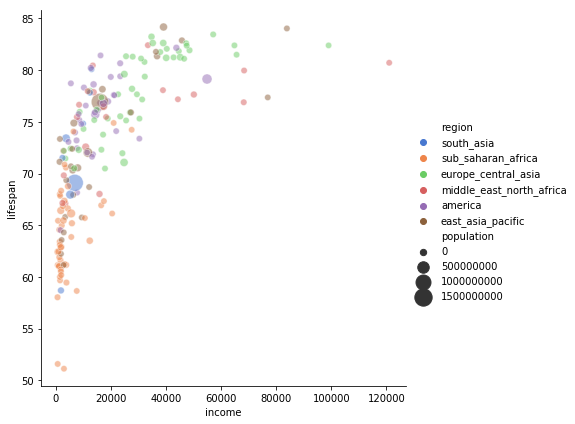

In [92]:

sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(40,300), alpha=0.5, palette='muted', height=6, data=now);

## Analyze outliers

In [93]:
now[now.income > 80000].sort_values(by='income', ascending=False)

,year,income,lifespan,population,country,region
30362,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
22212,2018,99034,82.39,590321,Luxembourg,europe_central_asia
31895,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [0]:
qatar = now[now.country == 'Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

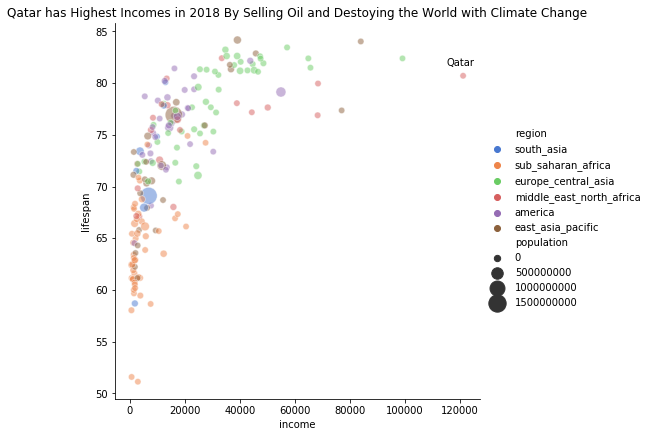

In [95]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', sizes=(40,300), alpha=0.5, palette='muted', height=6, data=now)
plt.text(x=qatar_income-6000, y=qatar_lifespan+1, s='Qatar')
plt.title('Qatar has Highest Incomes in 2018 By Selling Oil and Destoying the World with Climate Change');

## Plot multiple years

In [96]:
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]
centuries.shape

(552, 6)

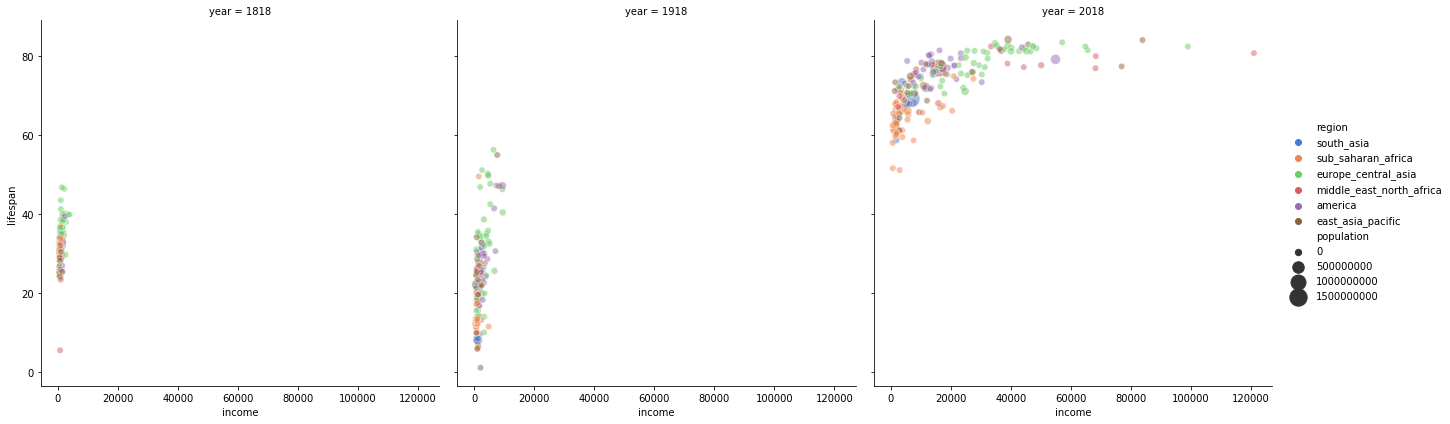

In [97]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', col='year', sizes=(40,300), alpha=0.5, palette='muted', height=6, data=centuries);

## Point out a story

# ASSIGNMENT
Replicate the lesson code

# STRETCH OPTIONS

## 1. Animate!
- [Making animations work in Google Colaboratory](https://medium.com/lambda-school-machine-learning/making-animations-work-in-google-colaboratory-new-home-for-ml-prototyping-c6147186ae75)
- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)

## 2. Work on anything related to your portfolio site / project

In [98]:
#new data to be added


vaccinated = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--dtp3_immunized_percent_of_one_year_olds--by--geo--time.csv')
print(vaccinated.shape)
vaccinated.head()

(5652, 3)


,geo,time,dtp3_immunized_percent_of_one_year_olds
0,afg,1980,4
1,afg,1981,3
2,afg,1982,5
3,afg,1983,5
4,afg,1984,16


In [99]:
infant_mortality = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--infant_mortality_rate_per_1000_births--by--geo--time.csv')
print(infant_mortality.shape)
infant_mortality.head()

(13654, 3)


,geo,time,infant_mortality_rate_per_1000_births
0,afg,1960,245.0
1,afg,1961,240.5
2,afg,1962,236.3
3,afg,1963,232.3
4,afg,1964,228.5


In [100]:
measles = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--measles_deaths_in_children_1_59_months_total_deaths--by--geo--time.csv')
print(measles.shape)
measles.head()

(5238, 3)


,geo,time,measles_deaths_in_children_1_59_months_total_deaths
0,afg,1990,18868.05
1,afg,1991,18503.61
2,afg,1992,18466.39
3,afg,1993,18699.34
4,afg,1994,19201.93


In [101]:
#merge data frames, inner, on geo and time
#cols we want: country, region, year, vaccinated, infant motal, measles

merged1 =  pd.merge(lifespan, entities[['country', 'name', 'world_6region']], how='inner', left_on='geo', right_on='country')
merged1.head()

,geo,time,life_expectancy_years,country,name,world_6region
0,abw,1800,34.42,abw,Aruba,america
1,abw,1801,34.42,abw,Aruba,america
2,abw,1802,34.42,abw,Aruba,america
3,abw,1803,34.42,abw,Aruba,america
4,abw,1804,34.42,abw,Aruba,america


In [102]:
merged1.shape

(44370, 6)

In [103]:
merge2 = pd.merge(vaccinated, infant_mortality, how='inner', on=['geo', 'time'])
print(merge2.shape)
merge2.head()

(5616, 4)


,geo,time,dtp3_immunized_percent_of_one_year_olds,infant_mortality_rate_per_1000_births
0,afg,1980,4,166.1
1,afg,1981,3,161.8
2,afg,1982,5,157.5
3,afg,1983,5,153.2
4,afg,1984,16,148.7


In [104]:
merge2.isna().sum()

geo                                        0
time                                       0
dtp3_immunized_percent_of_one_year_olds    0
infant_mortality_rate_per_1000_births      0
dtype: int64

In [105]:
merge3 = pd.merge(merge2, measles, how='inner', on=['geo', 'time'])
print(merge3.shape)
print(merge3.isna().sum())
merge3.head()

(3984, 5)
geo                                                    0
time                                                   0
dtp3_immunized_percent_of_one_year_olds                0
infant_mortality_rate_per_1000_births                  0
measles_deaths_in_children_1_59_months_total_deaths    0
dtype: int64


,geo,time,dtp3_immunized_percent_of_one_year_olds,infant_mortality_rate_per_1000_births,measles_deaths_in_children_1_59_months_total_deaths
0,afg,1990,25,122.5,18868.05
1,afg,1991,23,118.3,18503.61
2,afg,1992,21,114.4,18466.39
3,afg,1993,18,110.9,18699.34
4,afg,1994,12,107.7,19201.93


In [106]:
df = pd.merge(merged1, merge3, how='inner', on=['geo', 'time'])
print(df.shape)
print(df.isna().sum())
df.head()

(3984, 9)
geo                                                    0
time                                                   0
life_expectancy_years                                  0
country                                                0
name                                                   0
world_6region                                          0
dtp3_immunized_percent_of_one_year_olds                0
infant_mortality_rate_per_1000_births                  0
measles_deaths_in_children_1_59_months_total_deaths    0
dtype: int64


,geo,time,life_expectancy_years,country,name,world_6region,dtp3_immunized_percent_of_one_year_olds,infant_mortality_rate_per_1000_births,measles_deaths_in_children_1_59_months_total_deaths
0,afg,1990,51.61,afg,Afghanistan,south_asia,25,122.5,18868.05
1,afg,1991,51.29,afg,Afghanistan,south_asia,23,118.3,18503.61
2,afg,1992,51.42,afg,Afghanistan,south_asia,21,114.4,18466.39
3,afg,1993,51.35,afg,Afghanistan,south_asia,18,110.9,18699.34
4,afg,1994,50.71,afg,Afghanistan,south_asia,12,107.7,19201.93


In [107]:
df = df.drop(columns=['geo', 'country'])
df.head()

,time,life_expectancy_years,name,world_6region,dtp3_immunized_percent_of_one_year_olds,infant_mortality_rate_per_1000_births,measles_deaths_in_children_1_59_months_total_deaths
0,1990,51.61,Afghanistan,south_asia,25,122.5,18868.05
1,1991,51.29,Afghanistan,south_asia,23,118.3,18503.61
2,1992,51.42,Afghanistan,south_asia,21,114.4,18466.39
3,1993,51.35,Afghanistan,south_asia,18,110.9,18699.34
4,1994,50.71,Afghanistan,south_asia,12,107.7,19201.93


In [0]:
rename = {
    'time': 'Year',
    'life_expectancy_years': 'lifespan',
    'name': 'country',
    'world_6region': 'region',
    'dtp3_immunized_percent_of_one_year_olds': 'vaccinated_infant_percent',
    'infant_mortality_rate_per_1000_births': 'infant_mortality',
    'measles_deaths_in_children_1_59_months_total_deaths': 'child_measles_deaths'
}

In [109]:
df = df.rename(columns=rename)
df.head()

,Year,lifespan,country,region,vaccinated_infant_percent,infant_mortality,child_measles_deaths
0,1990,51.61,Afghanistan,south_asia,25,122.5,18868.05
1,1991,51.29,Afghanistan,south_asia,23,118.3,18503.61
2,1992,51.42,Afghanistan,south_asia,21,114.4,18466.39
3,1993,51.35,Afghanistan,south_asia,18,110.9,18699.34
4,1994,50.71,Afghanistan,south_asia,12,107.7,19201.93


In [110]:
df.country.unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece',

In [111]:
russia = df[df.country == 'Russia']
russia

,Year,lifespan,country,region,vaccinated_infant_percent,infant_mortality,child_measles_deaths
3054,1992,67.75,Russia,europe_central_asia,72,22.0,2.85
3055,1993,65.37,Russia,europe_central_asia,79,22.1,3.09
3056,1994,64.13,Russia,europe_central_asia,88,22.2,2.45
3057,1995,64.68,Russia,europe_central_asia,78,22.2,1.70
3058,1996,65.87,Russia,europe_central_asia,84,22.0,1.47
3059,1997,66.93,Russia,europe_central_asia,88,21.6,1.27
3060,1998,67.20,Russia,europe_central_asia,91,21.1,0.93
3061,1999,66.09,Russia,europe_central_asia,95,20.5,0.57
3062,2000,65.59,Russia,europe_central_asia,96,19.7,0.59
3063,2001,65.59,Russia,europe_central_asia,96,18.8,1.09


In [113]:
us = df[df.country == 'United States']
us

,Year,lifespan,country,region,vaccinated_infant_percent,infant_mortality,child_measles_deaths
3744,1990,75.40,United States,america,90,9.4,138.59
3745,1991,75.55,United States,america,86,9.1,46.79
3746,1992,75.71,United States,america,83,8.8,10.30
3747,1993,75.72,United States,america,88,8.5,1.37
3748,1994,75.79,United States,america,94,8.2,3.92
3749,1995,75.91,United States,america,95,8.0,1.19
3750,1996,76.24,United States,america,95,7.7,1.72
3751,1997,76.60,United States,america,96,7.5,0.49
3752,1998,76.74,United States,america,96,7.3,0.33
3753,1999,76.78,United States,america,96,7.2,0.33


In [115]:
now = df[df.Year == max(df.Year)]
now

,Year,lifespan,country,region,vaccinated_infant_percent,infant_mortality,child_measles_deaths
21,2011,56.71,Afghanistan,south_asia,66,73.4,22479.12
43,2011,60.90,Angola,sub_saharan_africa,86,106.8,1578.99
65,2011,76.69,Albania,europe_central_asia,99,14.3,0.03
80,2011,82.61,Andorra,europe_central_asia,99,2.4,0.00
102,2011,76.45,United Arab Emirates,middle_east_north_africa,94,7.0,5.61
124,2011,75.98,Argentina,america,93,12.7,1.57
144,2011,73.80,Armenia,europe_central_asia,95,15.3,0.01
166,2011,76.93,Antigua and Barbuda,america,99,7.2,0.00
188,2011,82.15,Australia,east_asia_pacific,92,3.8,0.10
210,2011,80.72,Austria,europe_central_asia,83,3.4,0.00


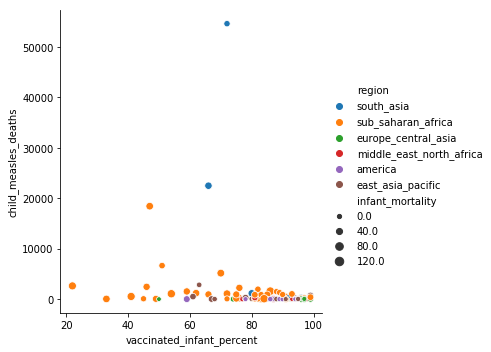

In [116]:
sns.relplot(x='vaccinated_infant_percent', y='child_measles_deaths', hue='region', size='infant_mortality', data=now)